<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Student_Performance.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [39]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,NaN,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0


# Завдання 1
Продивіться дані, видаліть пропущені значення з стовпчика `Perfomance Index`

In [40]:
df.shape

(10000, 6)

In [41]:
df = df.dropna(subset=['Performance Index', 'Hours Studied'])
df.shape

(9021, 6)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

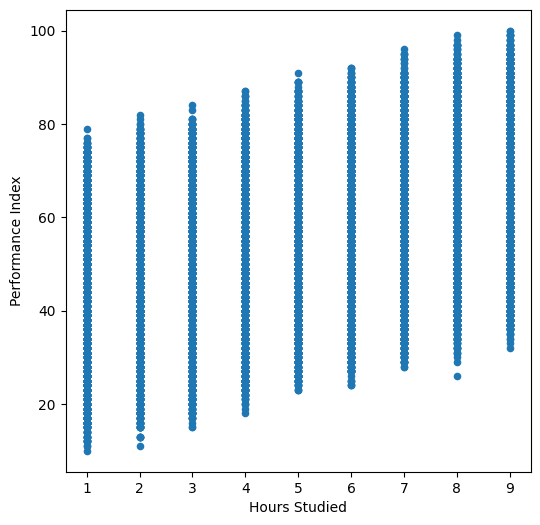

In [51]:
df.plot(kind='scatter', x='Hours Studied', y='Performance Index', figsize=(6,6))

# Завдання 2
Розбийте дані на тренувальні та тестові

In [43]:
y = df['Performance Index']
X = df[['Hours Studied']]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

# Завдання 3
Побудуйте `Pipeline` для заповнення пропущених значень в усіх стовпчиках.
Або заповніть пропуски медіаною кожного стовпчика.

# Завдання 4
Побудуйте модель та натренуйте її, виведіть метрики

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [46]:
model.coef_

array([2.77680125])

In [47]:
model.intercept_

41.2810743136346

In [48]:
hours = 7
model.predict([[hours]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60.71868309])

In [49]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

y_pred = model.predict(X_test)

all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

all_metrics

,train,test
MAE,15.38,15.59
MSE,315.97,324.06
RMSE,17.78,18.00
R2,0.14,0.14


# Завдання 5 оптимально
Спробуйте покращити модель